# Visualization

In this notebook, we visualize how measurements of interest, for example total tracer mass, evolves over time, with varyin conditions. 

The visualizations are based on the results from the "Simulation Notebook".

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dolfin
from multirat import *
from pathlib import Path
from dolfin import assemble, dx, Expression, Constant

In [2]:
MESH_DIR = Path("../mesh").resolve()
RESULTS_DIR = Path("../results").resolve()

In [3]:
def get_values(model, resolution, function, timestep, hours=np.inf):
    if timestep is None:
        storagepath = Path(f"../results/results-{model}-mesh{res}-dt{timestep}")
    else:
        storagepath = Path(f"../results/results-{model}-mesh{res}-dt{timestep}")
    storage = TimeSeriesStorage("r", storagepath)    
    
    endtime = 3600 * hours
    times = storage.times
    values = np.empty(times.size)

    for idx, (ti, u) in enumerate(storage.dual_iter()):
        if ti > endtime:
            for key in values:
                values = values[:idx]
                times = times[:idx]
            break
        values[idx] = function(u)
    
    if ti < endtime:
        print(f"Simulation stopped after {ti / 3600}h < {endtime / 3600}h requested.")
    
    storage.close()
    
    return times, values

In [4]:
center = parameters.PARAMS["injection_center"]
phi = parameters.PARAMS["porosity_ecs"]

cube2 = characteristic_cube(center, sidelength=2.0)
cube4 = characteristic_cube(center, sidelength=4.0)
cube5 = characteristic_cube(center, sidelength=5.0)

functions = {
    'amount_total': lambda u: assemble(u * dx),
    'amount_cube2': lambda u: assemble(cube2 * u * dx),
    'amount_cube4': lambda u: assemble(cube4 * u * dx),
    'amount_cube5': lambda u: assemble(cube5 * u * dx),
    'concentration_injection': lambda u: u(*center),
}
function_ylabels = {
    "amount_total": "Mass",
    "amount_cube2": "Mass",
    "amount_cube4": "Mass",
    "amount_cube5": "Mass",
    "concentration_injection": "Concentration"
}

In [5]:
# Pre-compute 
values = {}
times = {}

resolutions = [8]#, 16, 32, 64]
models = ["homogeneous", "tracerconservation", "tracerdecay"]
hours = 6


for model in models:
    for res in resolutions:
        for dt in timesteps:
            print(f"Model {model}, resolution {res}, timestep {dt}")
            for funcname, func in functions.items():
                times[(model, res, dt)], values[(model, res, dt, funcname)] = get_values(model, res, func, dt, hours)
            print()

Model homogeneous, resolution 16, timestep 60

Model homogeneous, resolution 16, timestep 600

Model homogeneous, resolution 16, timestep 3600

Model homogeneous, resolution 32, timestep 60

Model homogeneous, resolution 32, timestep 600

Model homogeneous, resolution 32, timestep 3600

Model homogeneous, resolution 64, timestep 60

Model homogeneous, resolution 64, timestep 600

Model homogeneous, resolution 64, timestep 3600

Model tracerconservation, resolution 16, timestep 60

Model tracerconservation, resolution 16, timestep 600

Model tracerconservation, resolution 16, timestep 3600

Model tracerconservation, resolution 32, timestep 60

Model tracerconservation, resolution 32, timestep 600

Model tracerconservation, resolution 32, timestep 3600

Model tracerconservation, resolution 64, timestep 60

Model tracerconservation, resolution 64, timestep 600

Model tracerconservation, resolution 64, timestep 3600

Model tracerdecay, resolution 16, timestep 60

Model tracerdecay, resolut

### Total vs Local Amounts 

In [6]:
def plot_wrapper(time, values, dt, relative=False, ax=None, *args, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    
    if relative:
        vals = values / values[0]
    else:
        vals = values

    ax.plot(time / 60, vals, lw=2.0, *args, **kwargs)
    ax.set_xlim(0, time[-1] / 60)
    ax.set_xticks(time[::int(60 / (dt/60))] / 60)
    ax.set_xlabel("Time (min)", fontsize=16)
    ax.set_ylim(0, None, auto=True)
    return ax

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


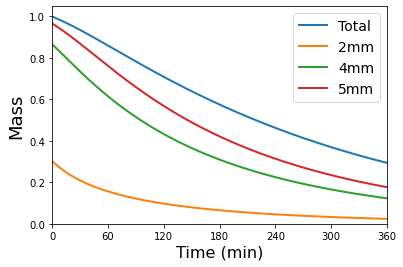

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


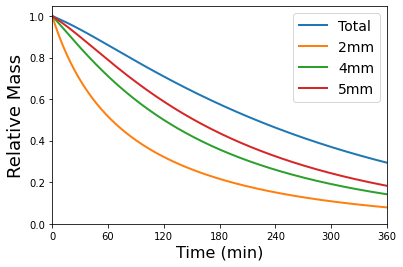

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


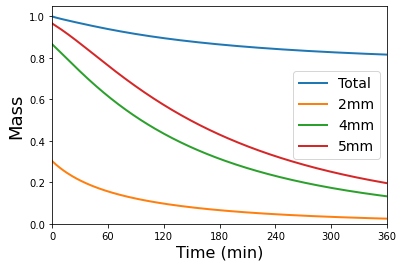

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


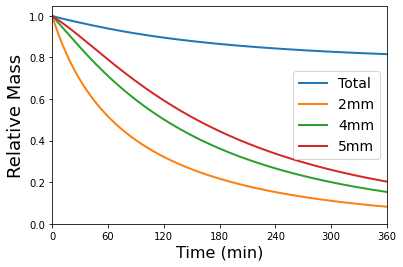

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


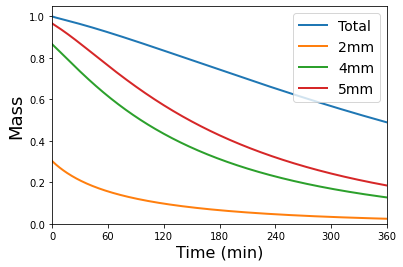

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


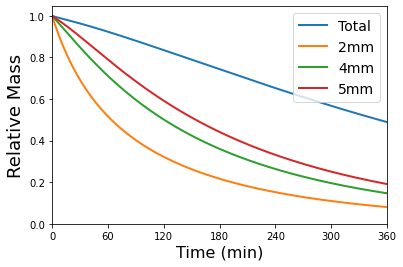

In [7]:
amount_plot_labels = {
    "amount_total": "Total",
    "amount_cube2": "2mm",
    "amount_cube4": "4mm",
    "amount_cube5": "5mm"
}

res = 32
dt = 60
for model in models:
    fig, ax = plt.subplots()
    time = times[(model, res, dt)]
    for funcname, funclabel in amount_plot_labels.items():
        plot_wrapper(time, values[(model, res, dt, funcname)], relative=False, dt=dt, label=funclabel, ax=ax)
        plt.ylabel(function_ylabels[funcname], fontsize=18)
    plt.legend(fontsize=14)
    plt.savefig(f"{RESULTS_DIR}/figures/inulin-diffusion-amounts-{model}-res{res}-dt{dt}-{hours}hours-absolute.png", bbox_inches="tight")
    plt.savefig(f"{RESULTS_DIR}/figures/eps/inulin-diffusion-amounts-{model}-res{res}-dt{dt}-{hours}hours-absolute.eps", format='eps', bbox_inches="tight")
    plt.show()

    fig, ax = plt.subplots()
    for funcname, funclabel in amount_plot_labels.items():
        plot_wrapper(time, values[(model, res, dt, funcname)], relative=True, dt=dt, label=funclabel, ax=ax)
        plt.ylabel("Relative " + function_ylabels[funcname], fontsize=18)
    plt.legend(fontsize=14)
    plt.savefig(f"{RESULTS_DIR}/figures/inulin-diffusion-amounts-{model}-res{res}-dt{dt}-{hours}hours-relative.png", bbox_inches="tight")
    plt.savefig(f"{RESULTS_DIR}/figures/eps/inulin-diffusion-amounts-{model}-res{res}-dt{dt}-{hours}hours-relative.eps", format="eps", bbox_inches="tight")

    plt.show()

## Mesh Refinement Effect

In [8]:
def plot_varying(collection, funcname):
    fig, ax = plt.subplots()
    for index in collections:
        time = times[index]
        plot_wrapper(time, values[(*index, funcname)], dt)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Model homogeneous
amount_total


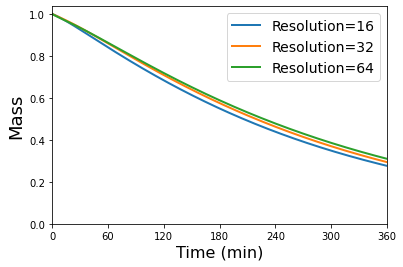

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


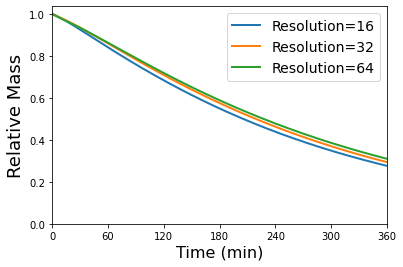

amount_cube2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


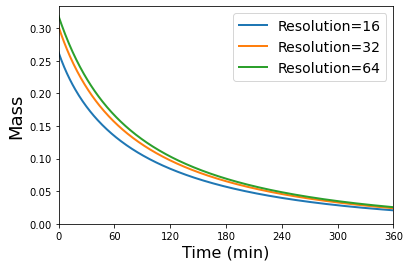

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


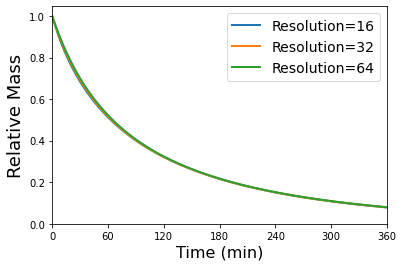

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


concentration_injection


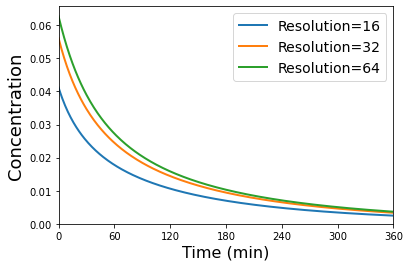

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


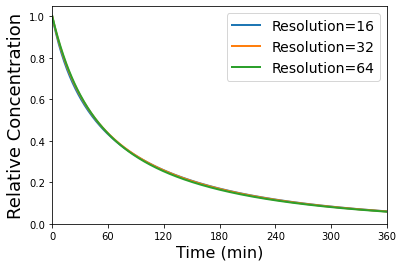

Model tracerconservation
amount_total


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


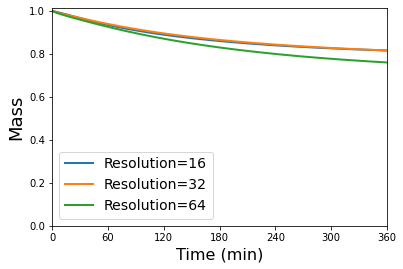

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


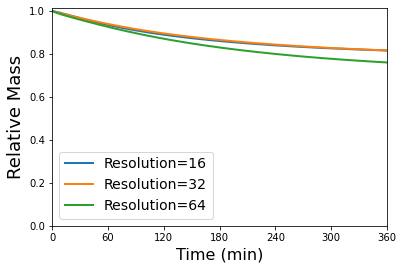

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


amount_cube2


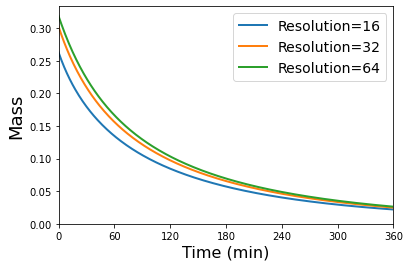

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


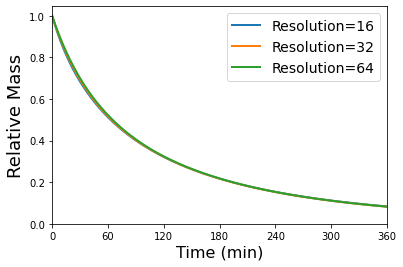

concentration_injection


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


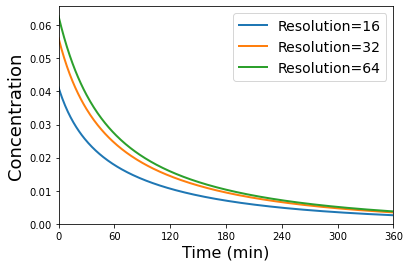

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


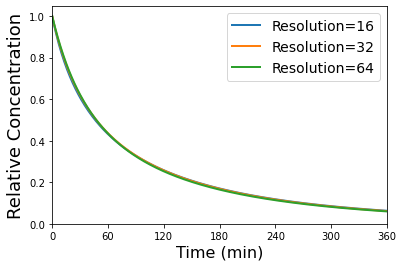

Model tracerdecay
amount_total


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


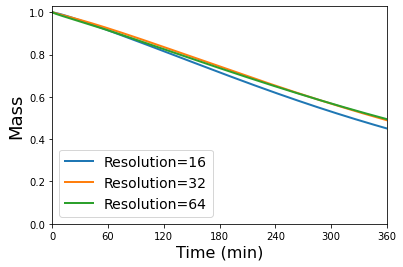

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


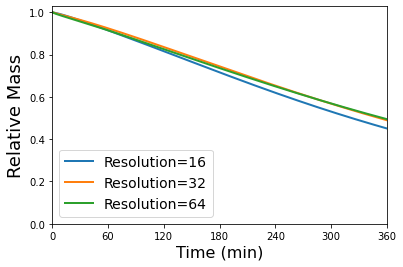

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


amount_cube2


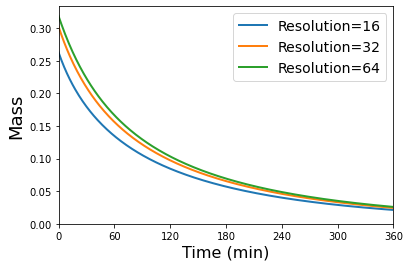

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


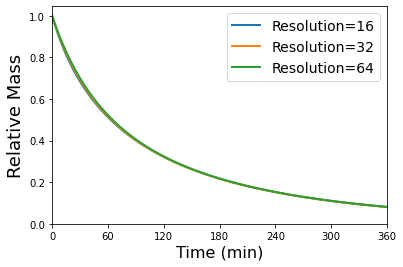

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


concentration_injection


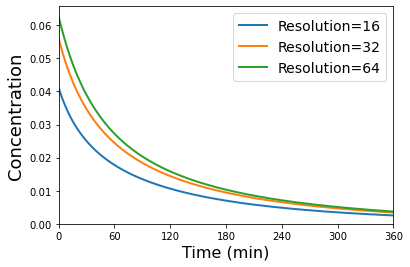

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


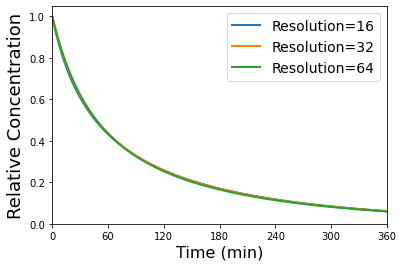

In [9]:
def plot_varying_resolution(resolutions, funcname, model, dt):    
    fig, ax = plt.subplots()
    for res in resolutions:
        time = times[(model, res, dt)]
        plot_wrapper(time, values[(model, res, dt, funcname)], dt, relative=False, label=f'Resolution={res}', ax=ax)
        plt.ylabel(function_ylabels[funcname], fontsize=18)
    plt.legend(fontsize=14)
    plt.savefig(f"{RESULTS_DIR}/figures/inulin-diffusion-resolutions-{model}-{funcname}-dt{dt}-{hours}hours-absolute.png", bbox_inches="tight")
    plt.savefig(f"{RESULTS_DIR}/figures/eps/inulin-diffusion-resolutions-{model}-{funcname}-dt{dt}-{hours}hours-absolute.eps", format='eps', bbox_inches="tight")
    plt.show()
    
    
    fig, ax = plt.subplots()
    for res in resolutions:
        time = times[(model, res, dt)]
        plot_wrapper(time, values[(model, res, dt, funcname)], dt, relative=True, label=f'Resolution={res}', ax=ax)
        plt.ylabel("Relative " + function_ylabels[funcname], fontsize=18)
    plt.legend(fontsize=14)
    plt.savefig(f"../results/figures/inulin-diffusion-resolutions-{model}-{funcname}-dt{dt}-{hours}hours-relative.png", bbox_inches="tight")
    plt.savefig(f"../results/figures/eps/inulin-diffusion-resolutions-{model}-{funcname}-dt{dt}-{hours}hours-relative.eps", format='eps', bbox_inches="tight")
    plt.show()

for model in models:
    print("Model", model)
    for func in ["amount_total", "amount_cube2", "concentration_injection"]:
        print(func)
        plot_varying_resolution([16, 32, 64], func, model, dt=60)
    print("=" * 80)

## Model Comparisons 

In [10]:
def plot_different_models(models, resolution, timestep, funcname):
    if models is None:
        models = {
            "homogeneous": "Homogeneous",
            "tracerconservation": "Tracer Conservation",
            "tracerdecay": "Tracer Decay"
        }
    
    fig, ax = plt.subplots()
    for modelname, model_label in models.items():
        time = times[(modelname, resolution, timestep)]
        plot_wrapper(time, values[(modelname, resolution, timestep, funcname)], dt, relative=True, label=model_label, ax=ax)
        plt.ylabel(function_ylabels[funcname], fontsize=18)

    plt.legend(fontsize=14)
    plt.savefig(f"{RESULTS_DIR}/figures/inulin-diffusion-models-res{resolution}-{funcname}-dt{dt}-{hours}hours-relative.eps", format="eps", bbox_inches="tight")
    plt.savefig(f"{RESULTS_DIR}/figures/eps/inulin-diffusion-models-res{resolution}-{funcname}-dt{dt}-{hours}hours-relative.png", bbox_inches="tight")
    plt.show()
    
    fig, ax = plt.subplots()
    for modelname, model_label in models.items():
        time = times[(modelname, resolution, timestep)]
        plot_wrapper(time, values[(modelname, resolution, timestep, funcname)], dt, relative=False, label=model_label, ax=ax)
        plt.ylabel("Relative " + function_ylabels[funcname], fontsize=18)

    plt.legend(fontsize=14)
#     plt.ylabel("$N(t)\,/\,N_0 $", fontsize=16)
#     plt.ylabel("Amount", fontsize=16)
    plt.savefig(f"{RESULTS_DIR}/figures/inulin-diffusion-models-res{resolution}-{funcname}-dt{dt}-{hours}hours-absolute.eps", format="eps", bbox_inches="tight")
    plt.savefig(f"{RESULTS_DIR}/figures/eps/inulin-diffusion-models-res{resolution}-{funcname}-dt{dt}-{hours}hours-absolute.png", bbox_inches="tight")
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Function amount_total


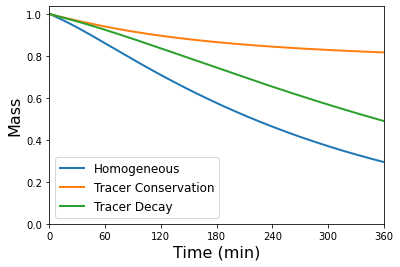

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


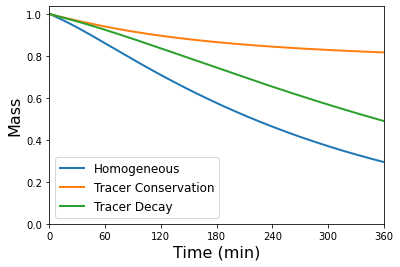

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Function amount_cube2


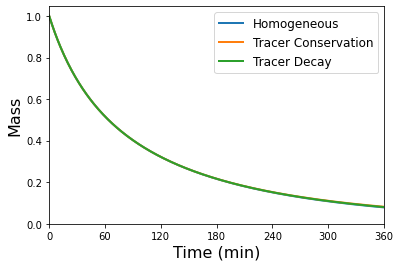

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


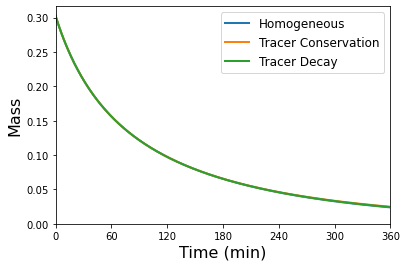


Function amount_cube4


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


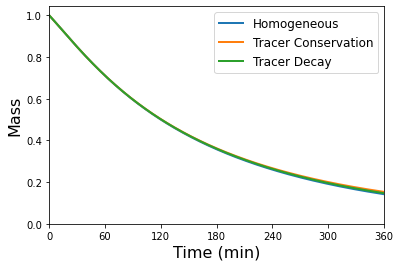

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


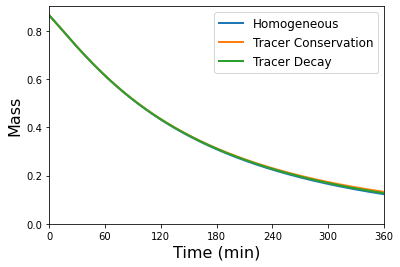

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Function amount_cube5


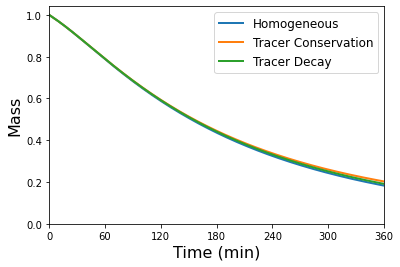

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


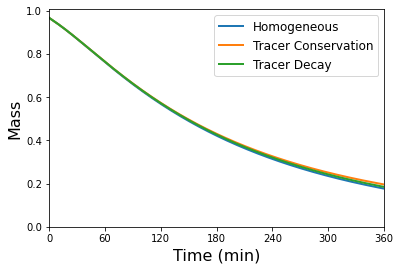

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Function concentration_injection


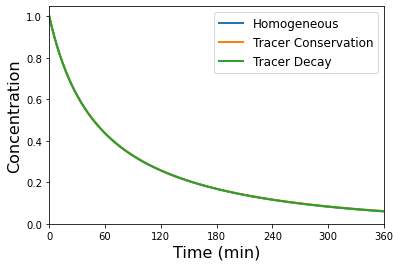

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


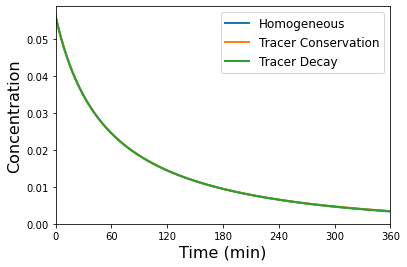

In [11]:
res = 32
dt = 60

models = {
    "homogeneous": "Homogeneous",
    "tracerconservation": "Tracer Conservation",
    "tracerdecay": "Tracer Decay"
}
for func in ["amount_total", "amount_cube2", "amount_cube4", "amount_cube5", "concentration_injection"]:
    print("Function", func)
    plot_different_models(models, res, dt, func)
    print("=" * 80)
    print()

## Time refinent effects

In [61]:
def plot_varying_timesteps(timesteps, model, resolution, funcname):
    fig, ax = plt.subplots()
    res = resolution
    for dt in timesteps:
        time = times[(model, res, dt)]
        plot_wrapper(time, values[(model, res, dt, funcname)], dt, relative=False, label=f'$\Delta t={dt}$s', ax=ax)
    plt.ylabel(function_ylabels[funcname], fontsize=18)
    plt.legend(fontsize=14)
    plt.savefig(f"../results/figures/inulin-diffusion-timesteps-{model}-res{res}-{funcname}-{hours}hours-absolute.png", bbox_inches="tight")
    plt.savefig(f"../results/figures/eps/inulin-diffusion-timesteps-{model}-res{res}-{funcname}-{hours}hours-absolute.eps",  format='eps', bbox_inches="tight")
    plt.show()
    
    fig, ax = plt.subplots()
    for dt in timesteps:
        time = times[(model, res, dt)]
        plot_wrapper(time, values[(model, res, dt, funcname)], dt, relative=True, label=f'$\Delta t={dt}$s', ax=ax)
    plt.ylabel("Relative " + function_ylabels[funcname], fontsize=18)
    plt.legend(fontsize=14)
    plt.savefig(f"../results/figures/inulin-diffusion-timesteps-{model}-res{res}-{funcname}-{hours}hours-relative.png", bbox_inches="tight")
    plt.savefig(f"../results/figures/eps/inulin-diffusion-timesteps-{model}-res{res}-{funcname}-{hours}hours-relative.eps", format='eps', bbox_inches="tight")
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Model homogeneous
amount_total


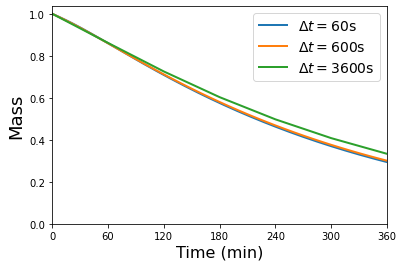

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


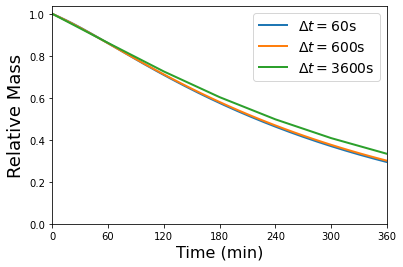

amount_cube2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


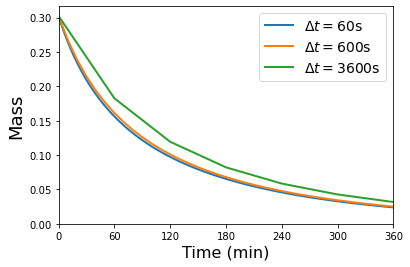

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


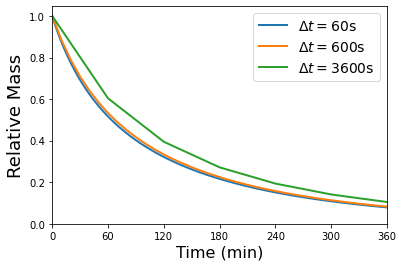

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


concentration_injection


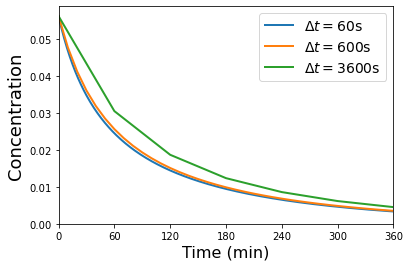

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


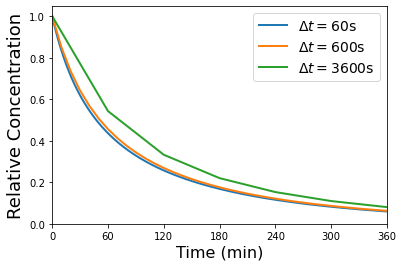

Model tracerconservation
amount_total


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


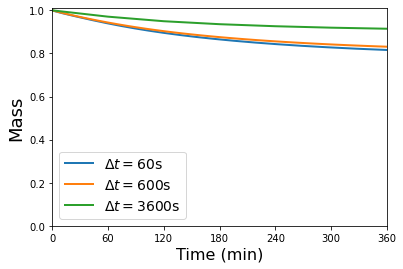

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


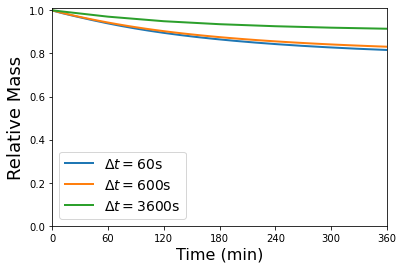

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


amount_cube2


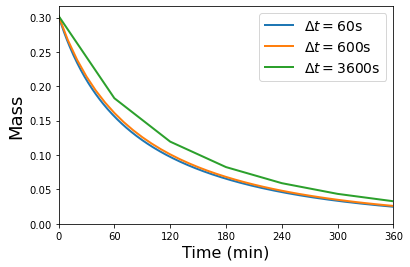

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


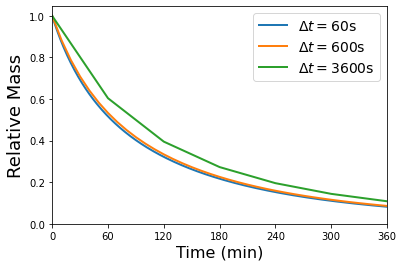

concentration_injection


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


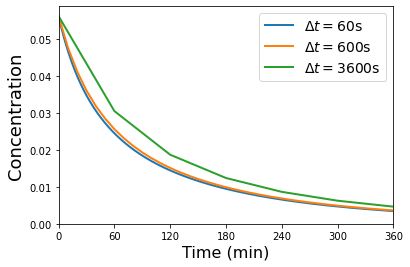

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


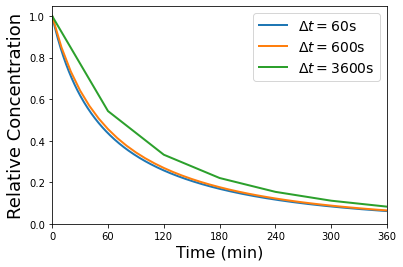

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Model tracerdecay
amount_total


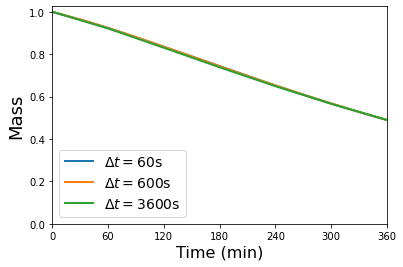

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


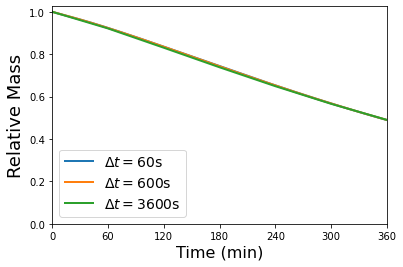

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


amount_cube2


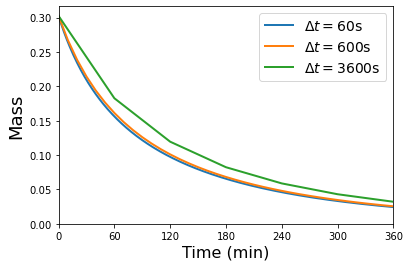

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


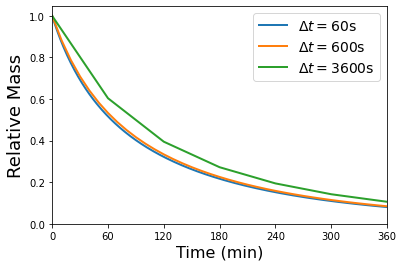

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


concentration_injection


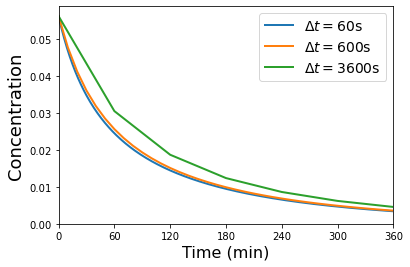

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


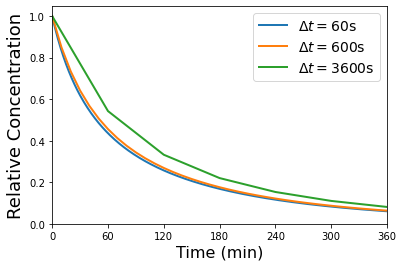

In [62]:
models = ["homogeneous", "tracerconservation", "tracerdecay"]
for model in models:
    print("Model", model)
    for func in ["amount_total", "amount_cube2", "concentration_injection"]:
        print(func)
        plot_varying_timesteps(timesteps, model, res, func)
    print("=" * 80)

## Multicompartment Time Visualization

In [3]:
def get_values(model, resolution, function, timestep, hours=np.inf):
    if timestep is None:
        storagepath = Path(f"~/Downloads/results/results-{model}-mesh{res}-dt{timestep}")
    else:
        storagepath = Path(f"~/Downloads/results/results-{model}-mesh{res}-dt{timestep}")
    storage = TimeSeriesStorage("r", storagepath)    
    
    endtime = 3600 * hours
    times = storage.times
    values = np.empty(times.size)

    for idx, (ti, u) in enumerate(storage.dual_iter()):
        if ti > endtime:
            for key in values:
                values = values[:idx]
                times = times[:idx]
            break
        values[idx] = function(u)
    
    if ti < endtime:
        print(f"Simulation stopped after {ti / 3600}h < {endtime / 3600}h requested.")
    
    storage.close()
    
    return times, values

In [12]:
hours = 6
timesteps = [60, 600, 3600]
resolutions = [16, 32, 64]
models = ["tracerdecay"]#["homogeneous", "tracerconservation", "tracerdecay"]
center = parameters.PARAMS["injection_center"]
phi = parameters.PARAMS["porosity-ecs"]

cube2 = characteristic_cube(center, sidelength=2.0)
cube4 = characteristic_cube(center, sidelength=4.0)
cube5 = characteristic_cube(center, sidelength=5.0)

functions = {
    'amount_total': lambda u: sum([assemble(ui * dx) for ui in u]),
    'amount_cube2': lambda u: sum([assemble(cube2 * ui * dx) for ui in u]),
#     'concentration_injection': lambda u: ([u(*center),
}
function_ylabels = {
    "amount_total": "Mass",
    "amount_cube2": "Mass",
    "amount_cube4": "Mass",
    "amount_cube5": "Mass",
    "concentration_injection": "Concentration"
}

In [54]:
# Pre-compute 
values = {}
times = {}
for model in models:
    for res in resolutions:
        for dt in timesteps:
            print(f"Model {model}, resolution {res}, timestep {dt}")
            for funcname, func in functions.items():
                times[(model, res, dt)], values[(model, res, dt, funcname)] = get_values(model, res, func, dt, hours)
            print()

Model homogeneous, resolution 16, timestep 60

Model homogeneous, resolution 16, timestep 600

Model homogeneous, resolution 16, timestep 3600

Model homogeneous, resolution 32, timestep 60

Model homogeneous, resolution 32, timestep 600

Model homogeneous, resolution 32, timestep 3600

Model homogeneous, resolution 64, timestep 60

Model homogeneous, resolution 64, timestep 600

Model homogeneous, resolution 64, timestep 3600

Model tracerconservation, resolution 16, timestep 60

Model tracerconservation, resolution 16, timestep 600

Model tracerconservation, resolution 16, timestep 3600

Model tracerconservation, resolution 32, timestep 60

Model tracerconservation, resolution 32, timestep 600

Model tracerconservation, resolution 32, timestep 3600

Model tracerconservation, resolution 64, timestep 60

Model tracerconservation, resolution 64, timestep 600

Model tracerconservation, resolution 64, timestep 3600

Model tracerdecay, resolution 16, timestep 60

Model tracerdecay, resolut

### Total vs Local Amounts 

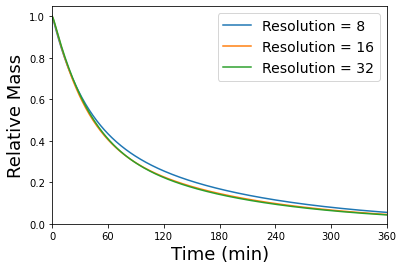

In [6]:
def plot_wrapper(time, values, dt, relative=False, ax=None, *args, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    
    if relative:
        vals = values / values[0]
    else:
        vals = values

    ax.plot(time / 60, vals, lw=2.0, *args, **kwargs)
    ax.set_xlim(0, time[-1] / 60)
    ax.set_xticks(time[::int(60 / (dt/60))] / 60)
    ax.set_xlabel("Time (min)", fontsize=16)
    ax.set_ylim(0, None, auto=True)
    return ax

resolution = [8, 16, 32]#, 64]
dt = 60
amounts = [
    np.loadtxt(f"/home/jorgen/Downloads/amount-multicomp-Decay-dt{float(dt)}-res{res}-4comps.csv") for res in resolution
]

for i, res in enumerate(resolution):
    plt.plot([dt * j for j, _ in enumerate(amounts[i])], amounts[i], label=f"Resolution = {res}")
plt.ylim(0, None)
plt.xlim(0, 3600 * 6)
plt.xticks([3600 * j for j in range(7)], [60 * j for j in range(7)])
plt.legend(fontsize=14)
plt.ylabel('Relative Mass', fontsize=18)
plt.xlabel("Time (min)", fontsize=18)
plt.ylim(0, None, auto=True)
plt.savefig("/home/jorgen/Downloads/7compartment-res-evolution.png", bbox_inches='tight')
plt.show()

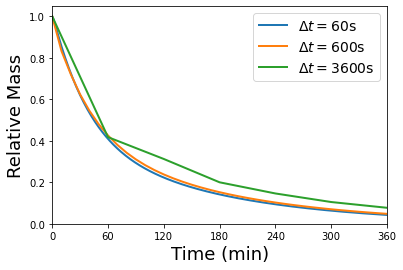

In [7]:
timesteps = [60, 600, 3600] # Should include 60 as well
amounts = [
    np.loadtxt(f"/home/jorgen/Downloads/amount-multicomp-Decay-dt{float(dt)}-4comps.csv") for dt in timesteps
]

for i, dt in enumerate(timesteps):
    plt.plot([dt * j for j, _ in enumerate(amounts[i])], amounts[i], lw=2, label=f"$\Delta t = {dt}$s")
plt.ylim(0, None)
plt.xlim(0, 3600 * 6)
plt.xticks([3600 * j for j in range(7)], [60 * j for j in range(7)])
plt.legend(fontsize=14)
plt.ylabel('Relative Mass', fontsize=18)
plt.xlabel("Time (min)", fontsize=18)
plt.ylim(0, None, auto=True)
plt.savefig("/home/jorgen/Downloads/7compartment-time-evolution.png", bbox_inches='tight')
plt.show()